In [10]:
from datetime import datetime
import pandas as pd
from fbprophet import Prophet

In [20]:
df = pd.read_csv('./data.csv')
df.head()

,Unnamed: 0,date,item_id,item_name,volume,unit_price,unit_cost,promo_flag,marketing,category_net_sales,category_margin,category1,category2,location,sales
0,0,07/01/2018,100,Chicken,38144.0,3.79,2.70,0,NaN,451692.0,0.25,Meat,Food,Helsinki,144565.76
1,1,14/01/2018,100,Chicken,36420.0,3.79,2.66,0,NaN,414342.0,0.25,Meat,Food,Helsinki,138031.80
2,2,21/01/2018,100,Chicken,35322.0,3.79,2.66,0,NaN,381854.0,0.25,Meat,Food,Helsinki,133870.38
3,3,28/01/2018,100,Chicken,133974.0,2.89,2.54,1,Star promotion (TV),494738.0,0.25,Meat,Food,Helsinki,387184.86
4,4,04/02/2018,100,Chicken,119808.0,2.89,2.55,1,Star promotion (TV),461214.0,0.25,Meat,Food,Helsinki,346245.12


In [22]:
df['ds'] = df['date']
df['y'] = df['sales']
for item_id in df.item_id.unique():
    df_item = df[df['item_id'] == item_id]
    print(df_item)
# df['ds'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# df = df[['ds', 'y']]
# print(df)

     Unnamed: 0        date  item_id item_name    volume  unit_price  \
0             0  07/01/2018      100   Chicken   38144.0        3.79   
1             1  14/01/2018      100   Chicken   36420.0        3.79   
2             2  21/01/2018      100   Chicken   35322.0        3.79   
3             3  28/01/2018      100   Chicken  133974.0        2.89   
4             4  04/02/2018      100   Chicken  119808.0        2.89   
5             5  11/02/2018      100   Chicken   36698.0        3.59   
6             6  18/02/2018      100   Chicken   23346.0        3.59   
7             7  25/02/2018      100   Chicken   36844.0        3.59   
8             8  04/03/2018      100   Chicken   34742.0        3.59   
9             9  11/03/2018      100   Chicken  164752.0        2.50   
10           10  18/03/2018      100   Chicken   33290.0        3.49   
11           11  25/03/2018      100   Chicken   30664.0        3.49   
12           12  01/04/2018      100   Chicken   32492.0        

In [17]:
model = Prophet()
model.fit(df)

/Users/kristskreics/.virtualenvs/airflow_jupyter/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future = model.make_future_dataframe(periods=365)
future.tail()
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print(forecast)

            ds          trend    yhat_lower     yhat_upper    trend_lower  \
0   2018-01-04   88936.643690  -6108.101072  182944.784139   88936.643690   
1   2018-01-04   88936.643690  -1592.787951  176380.908624   88936.643690   
2   2018-01-04   88936.643690  -3244.507529  180473.522967   88936.643690   
3   2018-01-04   88936.643690   1715.527109  178680.746904   88936.643690   
4   2018-01-04   88936.643690  -6912.147702  181072.617714   88936.643690   
5   2018-01-04   88936.643690  -3890.334429  175948.346220   88936.643690   
6   2018-01-07   89080.845424 -13488.762180  170610.925449   89080.845424   
7   2018-01-07   89080.845424 -20098.973053  170914.403577   89080.845424   
8   2018-01-07   89080.845424 -22458.545720  166806.795875   89080.845424   
9   2018-01-07   89080.845424 -15403.338883  172777.185575   89080.845424   
10  2018-01-07   89080.845424 -11557.580662  174916.722917   89080.845424   
11  2018-01-07   89080.845424 -17022.644324  177039.096936   89080.845424   

/Users/kristskreics/.virtualenvs/airflow_jupyter/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


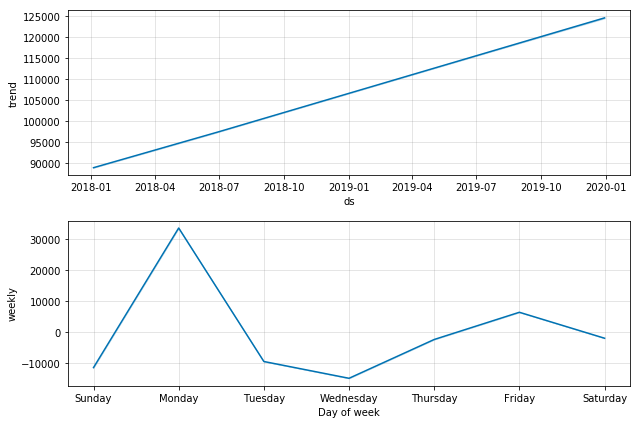

In [19]:
fig = model.plot_components(forecast)